In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('HR-Employee-Attrition.csv')
df=pd.DataFrame(data)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


# **BASIC EDA**

In [ ]:
percentage_attrition=df['Attrition'].value_counts(normalize=True)*100
print(percentage_attrition)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

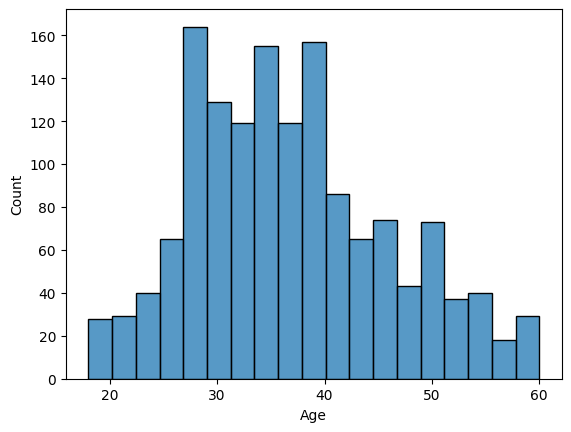

In [ ]:
sns.histplot(df['Age'])

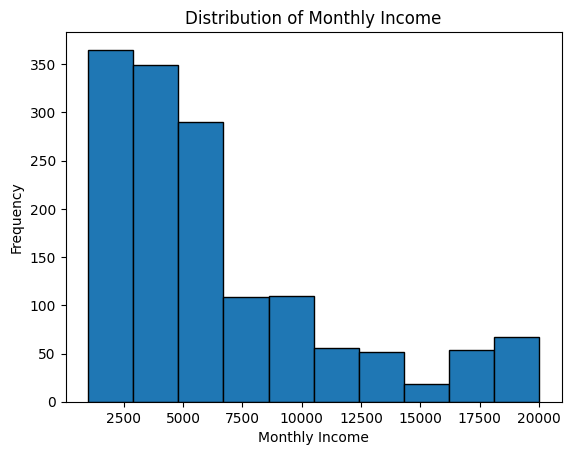

In [ ]:
plt.hist(df['MonthlyIncome'],edgecolor='black')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Income')
plt.show()

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

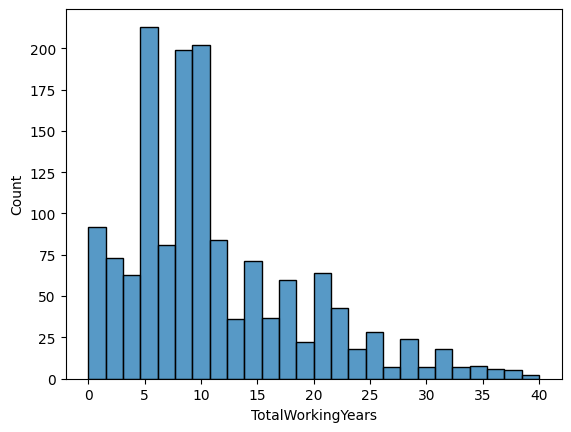

In [ ]:
sns.histplot(df['TotalWorkingYears'])

<Axes: >

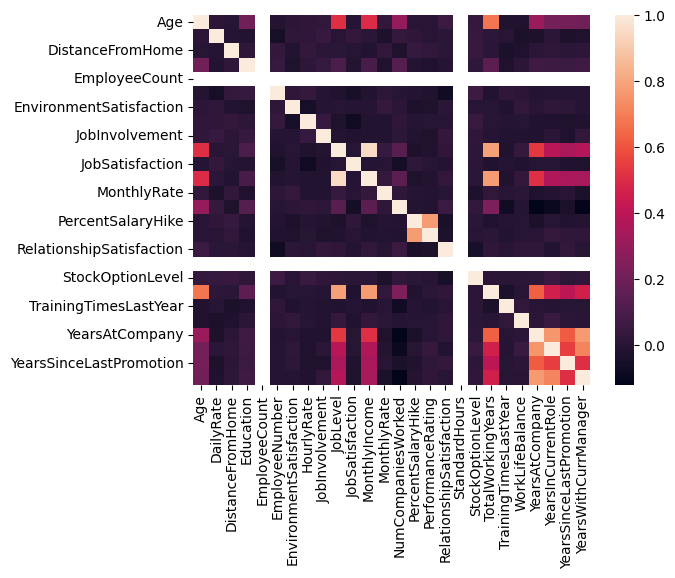

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

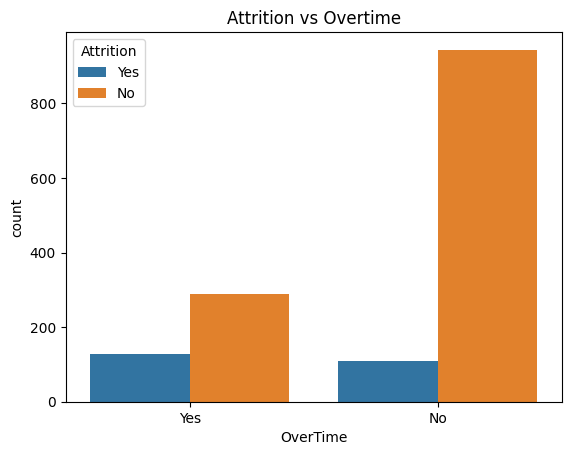

In [ ]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition vs Overtime")
plt.show()

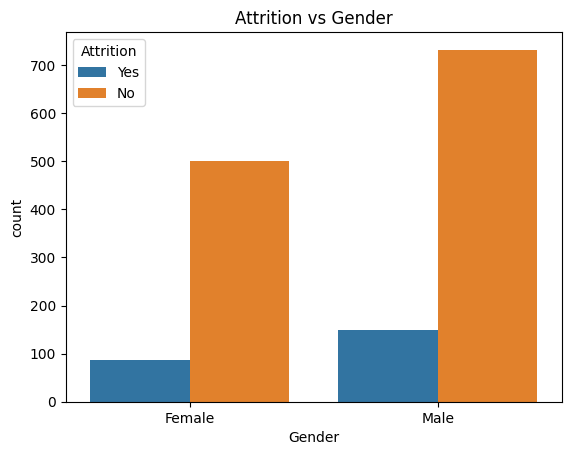

In [ ]:
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title('Attrition vs Gender')
plt.show()

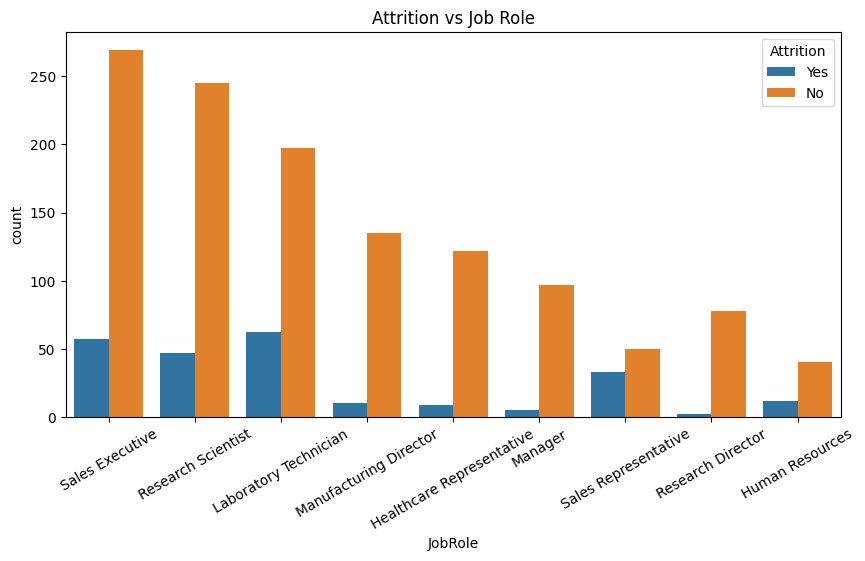

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.xticks(rotation=30)
plt.title("Attrition vs Job Role")
plt.show()

In [ ]:
for col in df.select_dtypes(include=['object']):
  attrition_rate = df.groupby(col)["Attrition"].value_counts(normalize=True)*100
  print(attrition_rate)

Attrition
No     100.0
Yes    100.0
Name: proportion, dtype: float64
BusinessTravel     Attrition
Non-Travel         No           92.000000
                   Yes           8.000000
Travel_Frequently  No           75.090253
                   Yes          24.909747
Travel_Rarely      No           85.043145
                   Yes          14.956855
Name: proportion, dtype: float64
Department              Attrition
Human Resources         No           80.952381
                        Yes          19.047619
Research & Development  No           86.160250
                        Yes          13.839750
Sales                   No           79.372197
                        Yes          20.627803
Name: proportion, dtype: float64
EducationField    Attrition
Human Resources   No           74.074074
                  Yes          25.925926
Life Sciences     No           85.313531
                  Yes          14.686469
Marketing         No           77.987421
                  Yes          22.0

In [ ]:
for col in df.select_dtypes(include=['object']):
    attrition_rate = pd.crosstab(df[col], df["Attrition"], normalize="index") * 100
    print(f"\nAttrition % by {col}:\n", attrition_rate.round(2))


Attrition % by Attrition:
 Attrition     No    Yes
Attrition              
No         100.0    0.0
Yes          0.0  100.0

Attrition % by BusinessTravel:
 Attrition             No    Yes
BusinessTravel                 
Non-Travel         92.00   8.00
Travel_Frequently  75.09  24.91
Travel_Rarely      85.04  14.96

Attrition % by Department:
 Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63

Attrition % by EducationField:
 Attrition            No    Yes
EducationField                
Human Resources   74.07  25.93
Life Sciences     85.31  14.69
Marketing         77.99  22.01
Medical           86.42  13.58
Other             86.59  13.41
Technical Degree  75.76  24.24

Attrition % by Gender:
 Attrition     No    Yes
Gender                 
Female     85.20  14.80
Male       82.99  17.01

Attrition % by JobRole:
 Attrition                     No    Yes
J

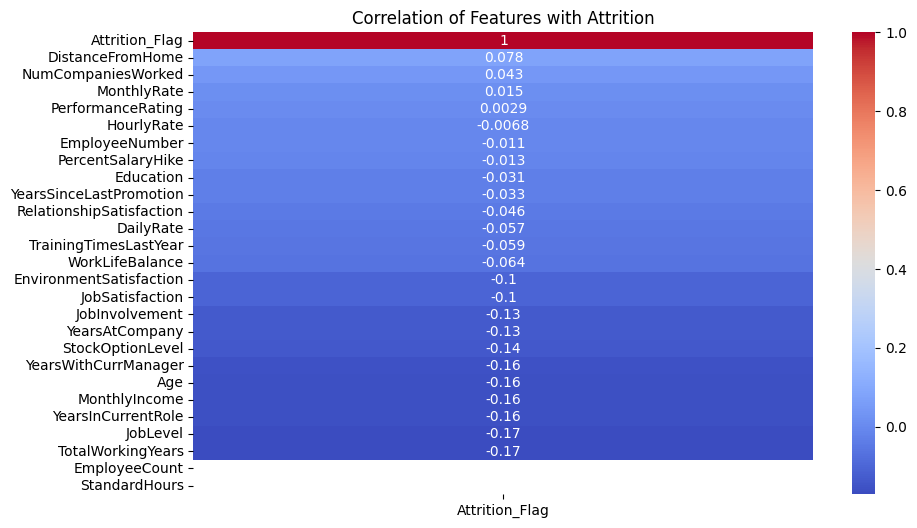

In [ ]:
# Convert Attrition Yes/No → 1/0
df["Attrition_Flag"] = df["Attrition"].map({"Yes":1, "No":0})

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True)[["Attrition_Flag"]].sort_values(by="Attrition_Flag", ascending=False),
            annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Attrition")
plt.show()

# **KEY INSIGHTS FROM VISUALIZATIONS**



### *  **OVERVIEW OF COMPANY EMPLOYEES**
* Most of the employees lies between the age group of 28 to 40 years .
* Most of the employees are in the salary range of 2000 to 7000.
* most of the employees are having a work experience of 5 to 12 years.   
### *  **Insights on ATTRITION**
* Male employees are leaving the jobs more frequntly than female employees .
* Younger employees are leaving the job more frequently.
* Longer Distance from home is also a main cause of job attrition.
* Attrition rate is higher in employees working overtime.
* Job attrition is highest in "SALES REPRESENTATIVE" job role.
* Department with highest job attrition in the company is "SALES".

### * **STRATEGIC BUSSINESS DECISIONS**
* Since male employees and younger employees are leaving more frequently,targeted retention programs,training,or benifits could be implemented for these groups.
* initiatives could focus on mentorship,career growth,and well being for younger staff.
* Allowing remote work option or flexible schedules could reduce turnover and improve employee satisfaction.
* Since attrition is higher is Sales Department, specialized interventions such as job enrichment,better tools, or enhanced workplace culture can be introduced in this department.
